In [1]:
import pandas as pd

In [2]:
# load data set:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
import numpy as np
final_list = []
quarter = list(data["Quarter"])
for qtr in quarter :
    if qtr[0:2] == "Q1":
        qtr = "03"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q2":
        qtr = "06"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q3":
        qtr = "09"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q4":
        qtr = "12"+qtr[2:]
        final_list.append(qtr)
data["Quarters"] = final_list
data.head()

,Quarter,Sales,Quarters
0,Q1_86,1734.827000,03_86
1,Q2_86,2244.960999,06_86
2,Q3_86,2533.804993,09_86
3,Q4_86,2154.962997,12_86
4,Q1_87,1547.818996,03_87


In [4]:
quarter

['Q1_86',
 'Q2_86',
 'Q3_86',
 'Q4_86',
 'Q1_87',
 'Q2_87',
 'Q3_87',
 'Q4_87',
 'Q1_88',
 'Q2_88',
 'Q3_88',
 'Q4_88',
 'Q1_89',
 'Q2_89',
 'Q3_89',
 'Q4_89',
 'Q1_90',
 'Q2_90',
 'Q3_90',
 'Q4_90',
 'Q1_91',
 'Q2_91',
 'Q3_91',
 'Q4_91',
 'Q1_92',
 'Q2_92',
 'Q3_92',
 'Q4_92',
 'Q1_93',
 'Q2_93',
 'Q3_93',
 'Q4_93',
 'Q1_94',
 'Q2_94',
 'Q3_94',
 'Q4_94',
 'Q1_95',
 'Q2_95',
 'Q3_95',
 'Q4_95',
 'Q1_96',
 'Q2_96']

In [5]:
data = data.drop("Quarter", axis=1)
data.head()

,Sales,Quarters
0,1734.827000,03_86
1,2244.960999,06_86
2,2533.804993,09_86
3,2154.962997,12_86
4,1547.818996,03_87


In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     42 non-null     float64
 1   Quarters  42 non-null     object 
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


Sales       0
Quarters    0
dtype: int64

In [7]:
data['Quarters'] = pd.to_datetime(data['Quarters'] , format="%m_%y")

In [9]:
data.head()

,Sales,Quarters
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01


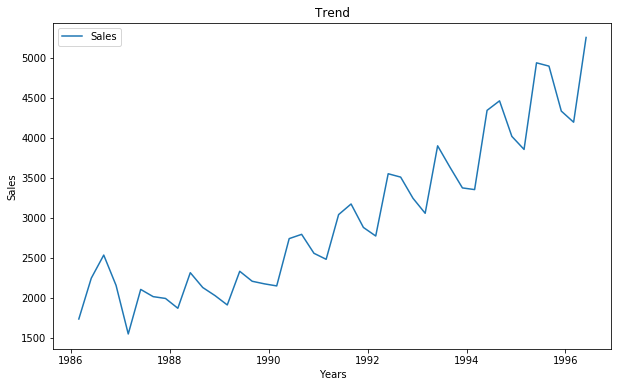

In [10]:
import matplotlib.pyplot as plt
# 
fig = plt.subplots(figsize=(10,6))
plt.plot(data["Quarters"], data["Sales"], label="Sales")
plt.title("Trend")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.legend()

Text(0.5, 1.0, 'Quarterlly Distribution of Sales')

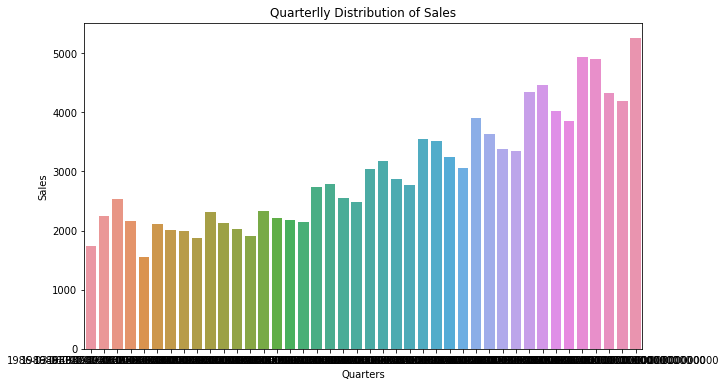

In [11]:
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.barplot(x=data["Quarters"], y=data["Sales"])
plt.title("Quarterlly Distribution of Sales")

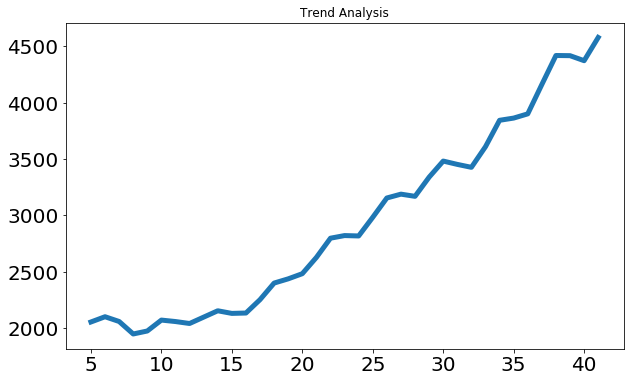

In [12]:
# Trend :
data["Sales"].rolling(6).mean().plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title("Trend Analysis")
plt.show()

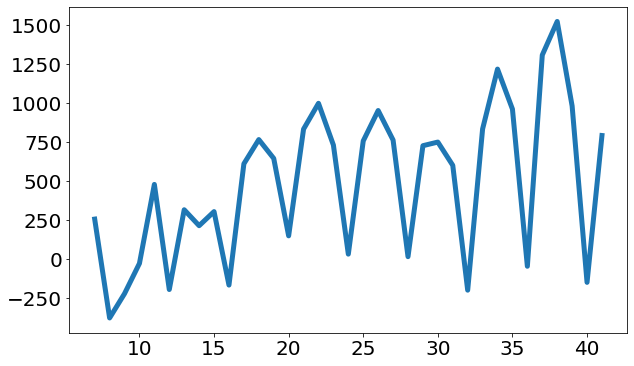

In [13]:
data["Sales"].diff(periods=7).plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.show()

In [14]:
data['month'] = data.Quarters.dt.strftime('%b')

In [16]:
data.head()

,Sales,Quarters,month
0,1734.827000,1986-03-01,Mar
1,2244.960999,1986-06-01,Jun
2,2533.804993,1986-09-01,Sep
3,2154.962997,1986-12-01,Dec
4,1547.818996,1987-03-01,Mar


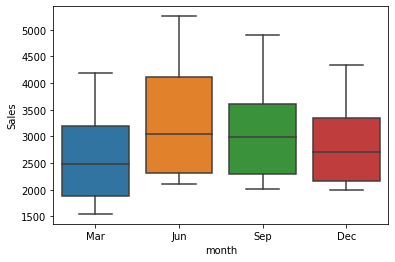

In [17]:
# Quaterlly distribution of sales :
sns.boxplot(x="month",y="Sales",data=data)

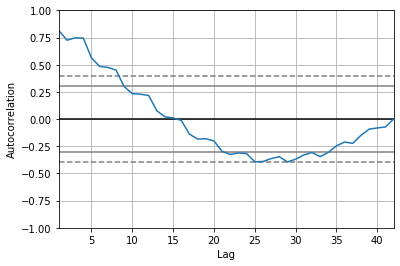

In [18]:
# ACF :
pd.plotting.autocorrelation_plot(data['Sales'])
plt.show()

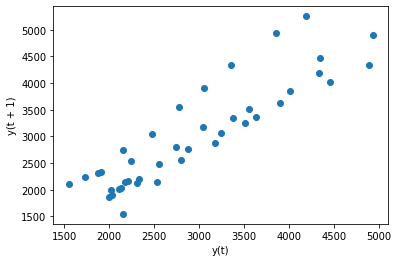

In [19]:
# LAG plot :
pd.plotting.lag_plot(data['Sales'])
plt.show()

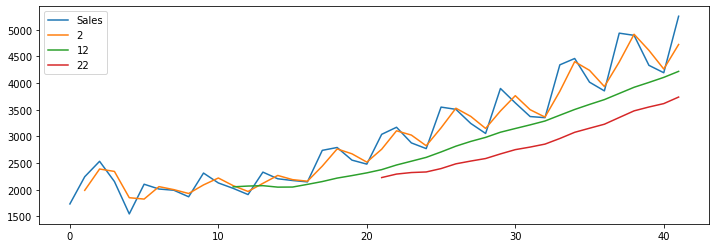

In [20]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="Sales")
for i in range(2,24,10):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Sales, order=(1,1,1))
model_fit = model.fit(disp=0)

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -300.368
Method:                       css-mle   S.D. of innovations            364.467
Date:                Wed, 11 Aug 2021   AIC                            608.737
Time:                        14:34:55   BIC                            615.591
Sample:                             1   HQIC                           611.233
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.8692     16.223      4.430      0.000      40.074     103.665
ar.L1.D.Sales     0.1461      0.204      0.717      0.473      -0.253       0.545
ma.L1.D.Sales    -0.7786      0.117     -6.683      0.000      -1.007      -0.550
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.8456           +0.0000j            6.8456            0.0000
MA.1            1.2844           +0.0000j            1.2844            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
residuals = pd.DataFrame(model_fit.resid)

In [24]:
rmse = np.mean((residuals)**2)**.5
print("rmse  :", rmse)

rmse  : 0    368.273278
dtype: float64


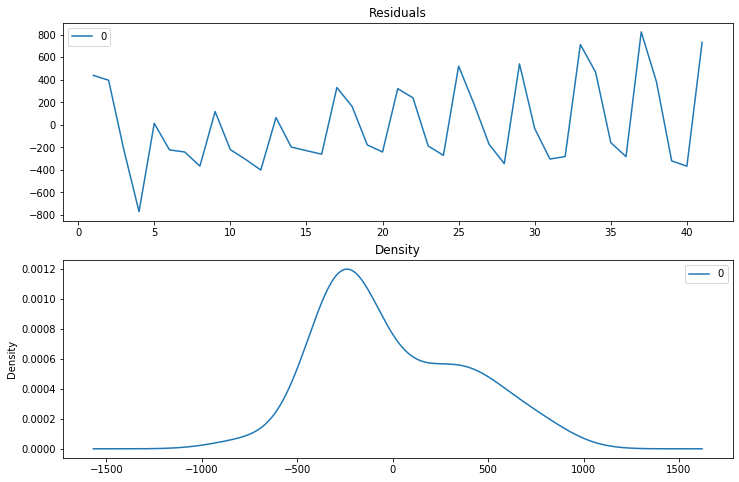

In [25]:
# Residual plot & Density of Residuals :
fig, ax = plt.subplots(2,1, figsize=(12,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

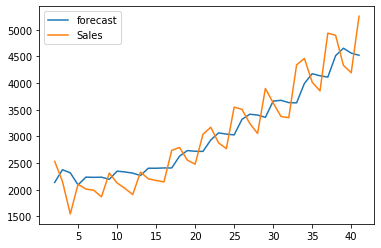

In [26]:
# prediction :
model_fit.plot_predict()
plt.show()

In [27]:
# split data :
train = data.Sales[0:32]
test = data.Sales[32:]

In [28]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

In [29]:
# forecast sales value :
forecast, se, conf = fitted.forecast(10, alpha=0.05)

In [30]:
# make series to form graph :
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

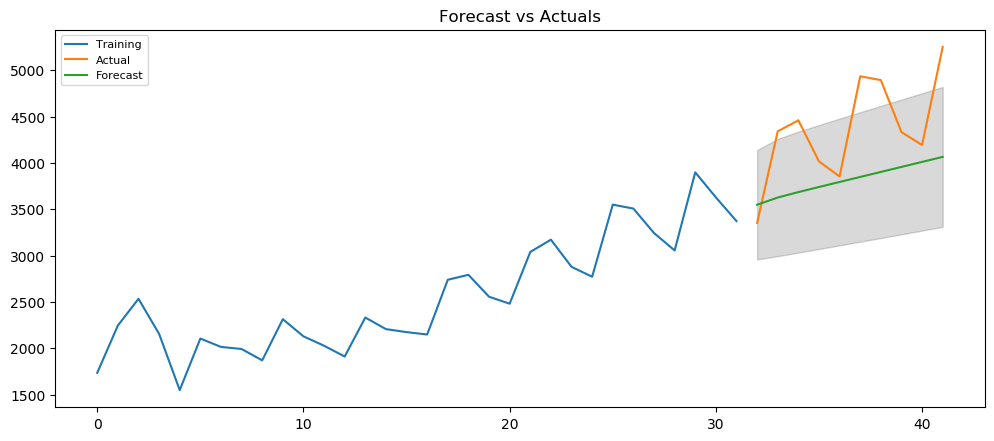

In [31]:
# Plot forecasting vs actual graph :
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [32]:
 from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'rmse': 705.5894755903157,
 'acf1': array([ 1.        , -0.14290051, -0.5251385 ,  0.14662986,  0.56077734,
        -0.28894835, -0.30713228,  0.10567395,  0.18853175, -0.23749326])}

In [33]:
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data["Sales"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -200.215
Date:                              Wed, 11 Aug 2021   AIC                            406.429
Time:                                      15:24:48   BIC                            410.531
Sample:                                           0   HQIC                           407.714
                                               - 42                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8621     22.807      0.038      0.970     -43.839      45.563
ma.S.L12      -0.89

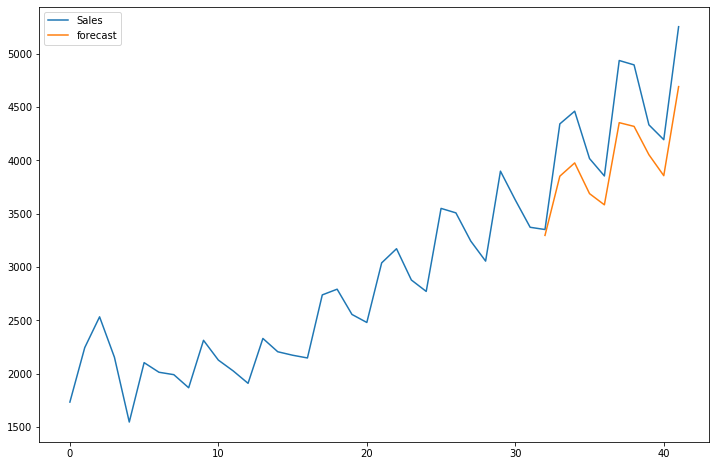

In [34]:
data['forecast'] = results.predict(start = 32, end=41 , dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.show()